In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [ ]:
from tqdm import tqdm # done

In [ ]:
from sklearn import model_selection   # make use of 'SciKit Learn' library
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import metrics

In [3]:
import optbinning

In [2]:
%%time
test = pd.read_feather("/content/drive/MyDrive/Project : Credit Default/Data Sets /test.feather")

NameError: name 'pd' is not defined

In [ ]:
%%time
train = pd.read_feather("/content/drive/MyDrive/Project : Credit Default/Data Sets /train.feather")
labels = pd.read_csv("/content/drive/MyDrive/Project : Credit Default/Data Sets /train_labels.csv")

CPU times: user 8.76 s, sys: 2.65 s, total: 11.4 s
Wall time: 45.6 s


In [ ]:
train.shape, test.shape , labels.shape   # check the dimension of data sets

((5531451, 190), (11363762, 190), (458913, 2))

In [ ]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827


In [ ]:
# We are considering last transactions of each customer_ID
train = train.groupby("customer_ID").tail(1).reset_index(drop = True)
test = test.groupby("customer_ID").tail(1).reset_index(drop = True)

In [ ]:
# merging with the targets values
train = train.merge(labels, on = 'customer_ID', how = 'left')

In [ ]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


In [ ]:
drop_cols = ['customer_ID','S_2','target'] # we will drop themm as they are
# not useful for the model and unnecessarily make slow
train_cols = [_ for _ in train.columns if _ not in drop_cols]

In [ ]:
categorical = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# IV score claculation for categorical and numerical type of data

iv_dict = {}
for _ in tqdm(train_cols): # what is this tqdm doing here?
  if _ in categorical :
    ob = optbinning.OptimalBinning(dtype = 'categorical')
    ob.fit(train[_],train['target'])
  else:
    ob = ob = optbinning.OptimalBinning(dtype = 'numerical')
    ob.fit(train[_],train['target'])
  binning_table = ob.binning_table
  binning_table.build()  # build does ?
  iv_dict[_] = binning_table.iv

iv_df = pd.Series(iv_dict)
iv_df.sort_values(ascending  = False, inplace = True )

100%|██████████| 188/188 [01:17<00:00,  2.44it/s]


In [ ]:
iv_df.head(75) # top 75 features

P_2     3.732496
D_48    2.406650
B_18    2.212995
B_7     2.106675
D_75    2.070369
          ...   
D_72    0.392019
R_3     0.389353
R_26    0.379131
D_56    0.372086
S_27    0.361552
Length: 75, dtype: float64

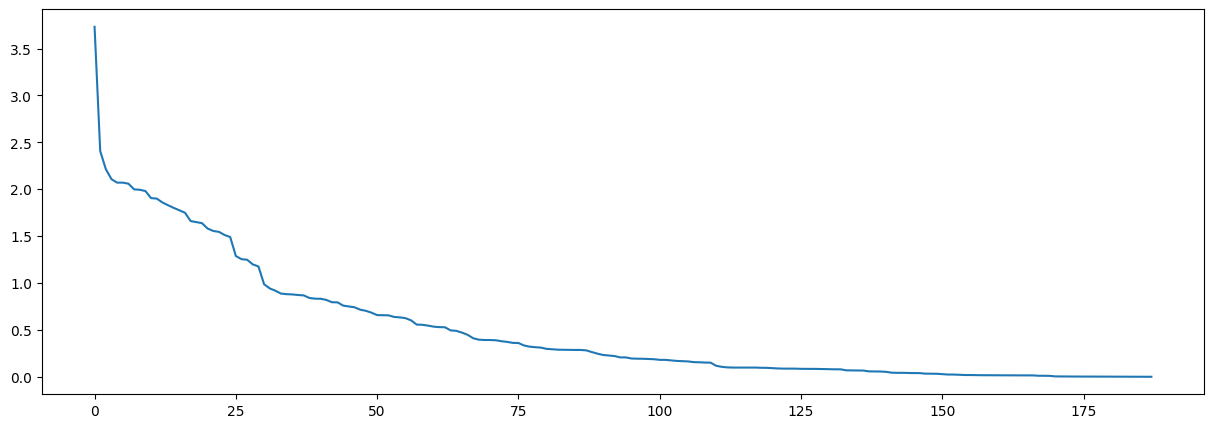

In [ ]:
# Comparison: iv scores and features (graph)
figure, axis = plt.subplots(figsize = (15,5))
iv_df.reset_index(drop = True).plot()
# add x and y labels
plt.show()

In [ ]:
ob = optbinning.OptimalBinning(dtype = 'numerical')
ob.fit(train['P_2'],train['target']) # we will check for 'P_2' column name
# 'P_2' has highest Information Value(IV)
binning_table = ob.binning_table
display(binning_table.build())

# Note: 'P_2' is a continuous feature splitted into 15 bins

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.18)",29733,0.064790,2631,27102,0.911512,-3.383762,0.745582,0.064705
1,"[0.18, 0.32)",34240,0.074611,8586,25654,0.749241,-2.146085,0.409141,0.043147
2,"[0.32, 0.43)",40102,0.087385,15556,24546,0.612089,-1.507621,0.242465,0.027729
3,"[0.43, 0.52)",41474,0.090374,22460,19014,0.458456,-0.884958,0.083160,0.010069
4,"[0.52, 0.58)",28361,0.061800,19500,8861,0.312436,-0.262764,0.004528,0.000564
5,"[0.58, 0.64)",32780,0.071430,26363,6417,0.195760,0.361492,0.008501,0.001057
6,"[0.64, 0.69)",22969,0.050051,20396,2573,0.112021,1.018748,0.039039,0.004679
7,"[0.69, 0.73)",23797,0.051855,22171,1626,0.068328,1.561144,0.080413,0.009141
8,"[0.73, 0.77)",24883,0.054222,23932,951,0.038219,2.173939,0.135583,0.014242
9,"[0.77, 0.82)",33368,0.072711,32634,734,0.021997,2.743082,0.246278,0.023740


In [ ]:
# Now, we will select the features for IV values > 0.5

s_f = iv_df[iv_df > 0.5].index.values  # s_f = selected features
categorical = [_ for _ in categorical if _ in s_f]
train_cols = [_ for _ in train.columns if _ in s_f]

In [ ]:
len(s_f) , categorical , len(train_cols) # 63 numerical and 2 categorical columns

(63, ['B_30', 'B_38'], 63)

In [ ]:
def drop_feature_selection(r , c , corr , r_id , c_id):
  if r_id >= c_id:
    return c
  else :
    return r

In [ ]:
cor_mat = train[train_cols].corr().abs()
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool_))
corr_df = upper_tri.stack().reset_index()
corr_df.columns = ['row', 'col', 'corr']
corr_df = corr_df.drop_duplicates()
corr_df = corr_df.sort_values('corr', ascending=False)
corr_df = corr_df.query("corr >= 0.8")  # query similar to SQL
corr_df['row_iv'] = corr_df['row'].map(iv_dict)
corr_df['col_iv'] = corr_df['col'].map(iv_dict)

corr_df['drop_feature'] = corr_df.apply(lambda x: drop_feature_selection(x['row'], x['col'], x['corr'], x['row_iv'], x['col_iv']), axis=1)

In [ ]:
corr_df

,row,col,corr,row_iv,col_iv,drop_feature
1531,D_62,D_77,0.999824,1.660473,1.176555,D_77
144,B_1,B_11,0.995629,1.829305,1.749460,B_11
898,B_7,B_23,0.994963,2.106675,2.059052,B_23
179,B_1,B_37,0.992982,1.829305,1.801300,B_37
1782,D_74,D_75,0.988533,1.554889,2.070369,D_74
1246,B_11,B_37,0.988209,1.749460,1.801300,B_11
1926,S_22,S_24,0.965077,0.795160,0.656930,S_24
1407,D_58,D_75,0.927898,1.512233,2.070369,D_58
1406,D_58,D_74,0.923637,1.512233,1.554889,D_58
233,B_2,B_33,0.918636,1.905190,1.638385,B_33


In [ ]:
corr_drop_features = corr_df['drop_feature'].unique().tolist()
# 'tolist()' converts into Python List

In [ ]:
corr_drop_features

['D_77',
 'B_11',
 'B_23',
 'B_37',
 'D_74',
 'S_24',
 'D_58',
 'B_33',
 'S_7',
 'B_16',
 'D_55',
 'B_2',
 'D_61']

In [ ]:
train_data, cv_data = model_selection.train_test_split(train, test_size=0.3, random_state=42, shuffle=True, stratify=train['target'])
train_data.shape, cv_data.shape

((321239, 191), (137674, 191))

In [ ]:
len(train_data)+len(cv_data) # hence data has been divided into CV data and Train data

458913

In [ ]:
s_f = [_ for _ in s_f if _ not in corr_drop_features]
categorical = [_ for _ in categorical if _ in s_f]
train_cols = [_ for _ in train.columns if _ in s_f]

In [ ]:
len(s_f) , len(categorical), len(train_cols)
# after visualizing the heatmap  the predictor count which are considered is
# reduced to 50 and 2 categorical

(50, 2, 50)

In [ ]:
X_train = train_data[train_cols].copy() # copy is made otherwise the two data
# points to the same address and can erroneous results
y_train = train_data['target'].copy()

In [ ]:
X_cv = cv_data[train_cols].copy()
y_cv = cv_data['target'].copy()

In [ ]:
X_test = test[train_cols].copy()

In [ ]:
type(X_train), type(y_train) , len(X_train),len(X_cv),len(y_cv),len(X_test)
# we will test data on nearly doubled size data

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 321239,
 137674,
 137674,
 924621)

In [ ]:
train_cols

['P_2',
 'D_39',
 'B_1',
 'R_1',
 'S_3',
 'D_41',
 'B_3',
 'D_43',
 'D_44',
 'B_4',
 'D_45',
 'R_2',
 'D_47',
 'D_48',
 'B_6',
 'B_7',
 'B_8',
 'D_51',
 'B_9',
 'D_52',
 'P_3',
 'B_10',
 'D_53',
 'R_4',
 'R_5',
 'B_14',
 'D_60',
 'D_62',
 'D_65',
 'B_17',
 'B_18',
 'B_19',
 'B_20',
 'R_6',
 'B_22',
 'D_70',
 'D_75',
 'R_7',
 'B_25',
 'B_26',
 'D_78',
 'B_28',
 'D_84',
 'B_30',
 'S_22',
 'S_23',
 'S_25',
 'B_38',
 'D_112',
 'B_40']

In [ ]:
binning_process = optbinning.BinningProcess(variable_names = train_cols,
                                            categorical_variables = categorical)
# variable_name take all the variables names and categorical_variables take
# the categorical variables

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
scorecard = optbinning.Scorecard(
    binning_process = binning_process,
    estimator = model,
    scaling_method = 'min_max',
    scaling_method_params = {'min':300,'max':850}
)
# 'pdo_odds' :  scaling_method

In [ ]:
%%time
scorecard.fit(X_train,y_train) # model training

CPU times: user 21.8 s, sys: 1.1 s, total: 22.9 s
Wall time: 21 s


Scorecard(binning_process=BinningProcess(categorical_variables=['B_30', 'B_38'],
                                         variable_names=['P_2', 'D_39', 'B_1',
                                                         'R_1', 'S_3', 'D_41',
                                                         'B_3', 'D_43', 'D_44',
                                                         'B_4', 'D_45', 'R_2',
                                                         'D_47', 'D_48', 'B_6',
                                                         'B_7', 'B_8', 'D_51',
                                                         'B_9', 'D_52', 'P_3',
                                                         'B_10', 'D_53', 'R_4',
                                                         'R_5', 'B_14', 'D_60',
                                                         'D_62', 'D_65', 'B_17', ...]),
          estimator=LogisticRegression(), scaling_method='min_max',
          scaling_method_params={'max': 850, 'min': 300})

In [ ]:
scorecard_df = scorecard.table(style = "detailed")
# storing scorecard into dataframe

In [ ]:
scorecard_df

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,P_2,0,"(-inf, 0.18)",20868,0.064961,1836,19032,0.912018,-3.390044,0.749514,0.064978,-0.370648,-13.599855
1,P_2,1,"[0.18, 0.32)",23497,0.073145,5829,17668,0.751926,-2.160421,0.405989,0.042728,-0.370648,-4.310522
2,P_2,2,"[0.32, 0.43)",28982,0.090219,11259,17723,0.611517,-1.505207,0.249523,0.028544,-0.370648,0.639372
3,P_2,3,"[0.43, 0.52)",28570,0.088937,15562,13008,0.455303,-0.872244,0.079386,0.009620,-0.370648,5.421166
4,P_2,4,"[0.52, 0.58)",20532,0.063915,14129,6403,0.311855,-0.260049,0.004584,0.000571,-0.370648,10.046069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,B_40,7,"[0.40, 0.49)",16063,0.050003,6964,9099,0.566457,-1.318922,0.105693,0.012330,0.084616,14.285332
8,B_40,8,"[0.49, 0.62)",19311,0.060114,8053,11258,0.582984,-1.386546,0.140758,0.016308,0.084616,14.401961
9,B_40,9,"[0.62, inf)",19610,0.061045,7030,12580,0.641509,-1.633433,0.198802,0.022410,0.084616,14.827757
10,B_40,10,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.084616,12.010639


In [ ]:
scorecard_df.head(10)

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,P_2,0,"(-inf, 0.18)",20868,0.064961,1836,19032,0.912018,-3.390044,0.749514,0.064978,-0.370648,-13.599855
1,P_2,1,"[0.18, 0.32)",23497,0.073145,5829,17668,0.751926,-2.160421,0.405989,0.042728,-0.370648,-4.310522
2,P_2,2,"[0.32, 0.43)",28982,0.090219,11259,17723,0.611517,-1.505207,0.249523,0.028544,-0.370648,0.639372
3,P_2,3,"[0.43, 0.52)",28570,0.088937,15562,13008,0.455303,-0.872244,0.079386,0.009620,-0.370648,5.421166
4,P_2,4,"[0.52, 0.58)",20532,0.063915,14129,6403,0.311855,-0.260049,0.004584,0.000571,-0.370648,10.046069
5,P_2,5,"[0.58, 0.64)",22246,0.069251,17923,4323,0.194327,0.370624,0.008642,0.001074,-0.370648,14.810559
6,P_2,6,"[0.64, 0.72)",28614,0.089074,25935,2679,0.093625,1.218638,0.093514,0.011016,-0.370648,21.216987
7,P_2,7,"[0.72, 0.77)",21791,0.067834,20911,880,0.040384,2.116597,0.163529,0.017317,-0.370648,28.000724
8,P_2,8,"[0.77, 0.82)",22292,0.069394,21798,494,0.022160,2.735526,0.234234,0.022606,-0.370648,32.676500
9,P_2,9,"[0.82, 0.86)",22600,0.070353,22362,238,0.010531,3.491336,0.317968,0.027100,-0.370648,38.386354


In [ ]:
scorecard_df.sample(25) # lets check randomly 25 values


,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
1,D_70,1,"[0.00, 0.01)",141585,0.440747,117204,24381,0.172200,0.518600,0.103316,0.012772,-0.089595,12.957676
13,D_52,13,Missing,861,0.002680,725,136,0.157956,0.622005,0.000877,0.000108,-0.036853,12.010639
1,B_4,1,"[0.01, 0.01)",17764,0.055298,17162,602,0.033889,2.298684,0.149079,0.015381,-0.428728,32.097540
10,D_45,10,"[0.40, 0.76)",51167,0.159280,45523,5644,0.110305,1.036113,0.127828,0.015300,-0.430839,21.109220
1,B_18,1,"[0.07, 0.13)",23599,0.073462,9263,14336,0.607483,-1.488257,0.198591,0.022760,0.076183,14.321583
4,D_52,4,"[0.09, 0.11)",28042,0.087293,20084,7958,0.283789,-0.125766,0.001422,0.000178,-0.036853,11.916171
9,S_22,9,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.110275,12.010639
1,R_5,1,"[0.00, 0.26)",177851,0.553641,138203,39648,0.222928,0.197172,0.020484,0.002556,0.225828,11.103081
5,P_2,5,"[0.58, 0.64)",22246,0.069251,17923,4323,0.194327,0.370624,0.008642,0.001074,-0.370648,14.810559
13,S_3,13,Missing,59692,0.185818,53265,6427,0.107669,1.063260,0.155747,0.018600,-0.334293,12.010639


In [ ]:
# query method takes a boolean condition and returns a data frame

In [ ]:
scorecard_df.query("Variable == 'P_2'")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,P_2,0,"(-inf, 0.18)",20868,0.064961,1836,19032,0.912018,-3.390044,0.749514,0.064978,-0.370648,-13.599855
1,P_2,1,"[0.18, 0.32)",23497,0.073145,5829,17668,0.751926,-2.160421,0.405989,0.042728,-0.370648,-4.310522
2,P_2,2,"[0.32, 0.43)",28982,0.090219,11259,17723,0.611517,-1.505207,0.249523,0.028544,-0.370648,0.639372
3,P_2,3,"[0.43, 0.52)",28570,0.088937,15562,13008,0.455303,-0.872244,0.079386,0.009620,-0.370648,5.421166
4,P_2,4,"[0.52, 0.58)",20532,0.063915,14129,6403,0.311855,-0.260049,0.004584,0.000571,-0.370648,10.046069
5,P_2,5,"[0.58, 0.64)",22246,0.069251,17923,4323,0.194327,0.370624,0.008642,0.001074,-0.370648,14.810559
6,P_2,6,"[0.64, 0.72)",28614,0.089074,25935,2679,0.093625,1.218638,0.093514,0.011016,-0.370648,21.216987
7,P_2,7,"[0.72, 0.77)",21791,0.067834,20911,880,0.040384,2.116597,0.163529,0.017317,-0.370648,28.000724
8,P_2,8,"[0.77, 0.82)",22292,0.069394,21798,494,0.022160,2.735526,0.234234,0.022606,-0.370648,32.676500
9,P_2,9,"[0.82, 0.86)",22600,0.070353,22362,238,0.010531,3.491336,0.317968,0.027100,-0.370648,38.386354


In [ ]:
len(scorecard_df)

540

In [ ]:
# here we can observe feature points scores
# say if P_2 value is 0.73 then it will lie in the 7th bin and one can
# check feature score in the last column

In [ ]:
##### METRICS provided by the competition 

In [ ]:
# Hidden --> provided by Amex as a metric
def metric(y_true, y_pred, return_components=False) -> float:
    """Amex metric for ndarrays"""
    def top_four_percent_captured(df) -> float:
        """Corresponds to the recall for a threshold of 4 %"""
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()

    def weighted_gini(df) -> float:
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(df) -> float:
        """Corresponds to 2 * AUC - 1"""
        df2 = pd.DataFrame({'target': df.target, 'prediction': df.target})
        df2.sort_values('prediction', ascending=False, inplace=True)
        return weighted_gini(df) / weighted_gini(df2)

    df = pd.DataFrame({'target': y_true.ravel(), 'prediction': y_pred.ravel()})
    df.sort_values('prediction', ascending=False, inplace=True)
    g = normalized_weighted_gini(df)
    d = top_four_percent_captured(df)

    if return_components: return g, d, 0.5 * (g + d)
    return 0.5 * (g + d)


In [ ]:
train_data['pred_prob'] = scorecard.predict_proba(X_train)[:,1]
cv_data['pred_prob'] = scorecard.predict_proba(X_cv)[:,1]

In [ ]:
train_score = metric(train_data['target'],train_data['pred_prob'])
cv_score = metric(cv_data['target'],cv_data['pred_prob'])

print("Training Score = ",train_score)
print("CV score = ", cv_score)

Training Score =  0.7549500586598745
CV score =  0.7572452251998683


In [ ]:
fpr_t , tpr_t , thresholds = metrics.roc_curve(y_train,train_data['pred_prob'])
# returns three values i.e false +ve rate , true +ve rate , thresholds
opt_idx = np.argmax(tpr_t - fpr_t)
opt_threshold_t = thresholds[opt_idx]
print("Threshold Value(Train): ", opt_threshold_t)

Threshold Value(Train):  0.23821258211159177


In [ ]:
fpr_cv , tpr_cv , thresholds = metrics.roc_curve(y_cv,cv_data['pred_prob'])
opt_idx = np.argmax(tpr_cv - fpr_cv)
# argmax returns the index of maximum value

opt_threshold_cv = thresholds[opt_idx]
print("Threshold Value(Train): ", opt_threshold_cv)

Threshold Value(Train):  0.2344109155635671


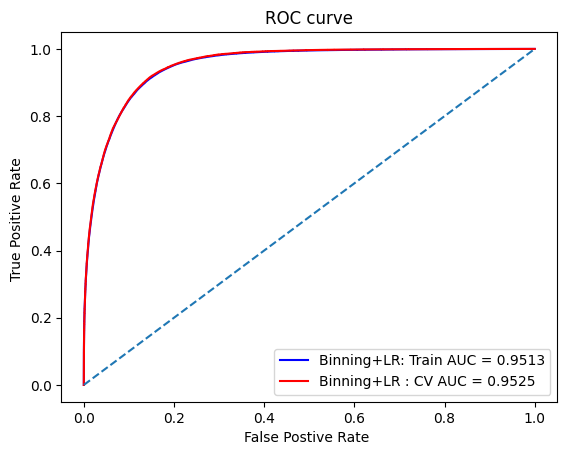

In [ ]:
auc_score_t = metrics.auc(fpr_t , tpr_t)
auc_score_cv = metrics.auc(fpr_cv , tpr_cv)
plt.title("ROC curve")
plt.plot(fpr_t,tpr_t,'b',
         label = 'Binning+LR: Train AUC = {0:.4f}'.format(auc_score_t))
plt.plot(fpr_cv,tpr_cv,'r',
         label = 'Binning+LR : CV AUC = {0:.4f}'.format(auc_score_cv))

plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],"--")
plt.xlabel('False Postive Rate ')
plt.ylabel('True Positive Rate ')
plt.show()

In [ ]:
auc_score_t,auc_score_cv
# we can see that area under curve for both CV and Train data are almost same.

(0.9513135581009895, 0.9524880298469875)

In [ ]:
train_data.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145',
       'target', 'pred_prob'],
      dtype='object', length=192)

In [ ]:
train_data['predict'] = (train_data['pred_prob']>opt_threshold_t).astype(int)
# astype(data_type): converts pandas object to specified data type
cv_data['predict'] = (cv_data['pred_prob']>opt_threshold_t).astype(int)

In [ ]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,pred_prob,predict
19899,0b2b4df2624ab3bba7793b6caebd209ebc6d9de2e988bb...,2018-03-22,0.861328,0.243896,0.007381,0.810059,0.003252,0.420166,0.000018,0.013550,...,0.000132,0.001688,0.004585,NaN,0.000289,0.004536,0.006741,0,0.011593,0
90536,32614f869c50b46ef2b19a3e8e26edb011f108aedcbda9...,2018-03-23,1.000977,0.001510,0.002718,0.812500,0.008041,NaN,0.004555,0.005180,...,0.006100,0.001206,0.004078,NaN,0.005604,0.004105,0.006115,0,0.002793,0
154637,560fb77a998ba14ec89631644797168df73fbaaf819403...,2018-03-23,0.275146,0.002838,0.086365,0.137329,0.003109,0.340576,0.170532,0.104919,...,0.002724,0.002096,0.009804,NaN,0.004032,0.005054,0.003586,1,0.422404,1
284905,9ea935127f4b1223b6cb6e8f766800a146133d74d08c15...,2018-03-23,0.364746,0.117798,0.117554,0.000818,0.005150,0.257080,0.177612,0.006168,...,0.008820,0.009048,0.005432,NaN,0.009293,0.009743,0.005512,1,0.752394,1
97891,3678d683a645be7d8342d74ef7a231b2848922690db520...,2018-03-28,0.627930,0.269287,0.057953,1.003906,0.007607,0.097290,0.000456,0.009018,...,0.000301,0.005062,0.007088,NaN,0.004883,0.001126,0.005821,0,0.017201,0


In [ ]:
cv_data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,pred_prob,predict
120725,43151123fd6f8a9290f65a8f56af2db5d0f504c1d8085f...,2018-03-26,0.926270,0.239136,0.049713,1.004883,0.000398,0.102295,0.005348,0.003099,...,0.003832,0.001286,0.003265,NaN,0.008537,0.009346,0.000345,0,0.003987,0
455297,fdfa900dc36acac32ae1db2640b6b27a834eed0e374e3f...,2018-03-28,0.534668,0.004967,0.002647,0.817383,0.006962,NaN,0.004635,0.001966,...,0.004936,0.008492,0.000273,NaN,0.008064,0.009941,0.002853,1,0.233671,0
364070,cad1a541f10fb04af81d63db75487e10fd609346df9353...,2018-03-12,0.493164,0.708984,0.433350,0.016937,0.007015,0.292480,0.004654,1.196289,...,0.000866,0.000270,0.006950,NaN,0.003090,0.007202,0.006798,1,0.734966,1
158101,57fb4f0508637a512682f602a302508a0fe7a033d23182...,2018-03-01,0.362305,0.470947,0.100342,0.345215,1.009766,0.056091,0.604004,0.075256,...,0.000896,0.003115,0.003979,NaN,0.000522,0.005062,0.007244,0,0.650591,1
116805,40e7ee3e3e20eb63ffd72a10d15c61df5f7a7f648fc307...,2018-03-14,0.658203,0.362549,0.139648,0.486328,0.007393,0.451660,0.005569,0.091309,...,0.005478,0.002136,0.006016,NaN,0.005192,0.001140,0.009018,1,0.283672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73431,290ace2677812b1793625d297b79fbdb6331b12ddbbadc...,2018-03-08,0.497559,0.003048,0.009468,0.816895,0.009842,NaN,0.008926,0.009041,...,0.004959,0.003481,0.000828,NaN,0.002934,0.007225,0.006065,0,0.181037,0
155297,566c39bb3c83b02209473080dedf591e79127c1e13b14e...,2018-03-12,0.243164,0.002548,0.432617,0.105103,0.008232,0.156006,0.272705,0.250977,...,0.001993,0.000747,0.005032,NaN,0.007950,0.003860,0.005634,0,0.623207,1
150293,53a181a15946940204ce6232cf18e05459a634a50e74b8...,2018-03-07,0.640625,0.564941,0.161621,0.156006,0.009384,0.124207,0.172607,0.171509,...,0.006607,0.002195,0.005730,NaN,0.005798,0.006107,0.003092,0,0.107455,0
429069,ef38d1ff72274da521651ca5487793d1d4e7c612d280ea...,2018-03-17,-0.012093,2.685547,0.730957,0.005791,1.503906,NaN,2.341797,0.478027,...,0.007042,0.006992,0.003048,NaN,0.008255,0.008705,0.005398,1,0.983170,1


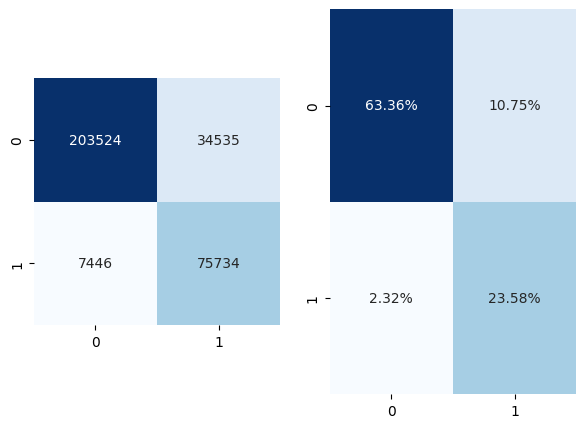

In [ ]:
# Now we will make confusion Matrix
conf_matrix = metrics.confusion_matrix(train_data['target'],train_data['predict'])
figure,(ax_1,ax_2) = plt.subplots(1,2, figsize = (7,5))

sns.heatmap(conf_matrix, square = True, annot = True,
            cmap = 'Blues',fmt = 'd' ,cbar = False ,ax= ax_1)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot = True,
            cmap = 'Blues',fmt = '.2%' ,cbar = False ,ax= ax_2)
plt.show()

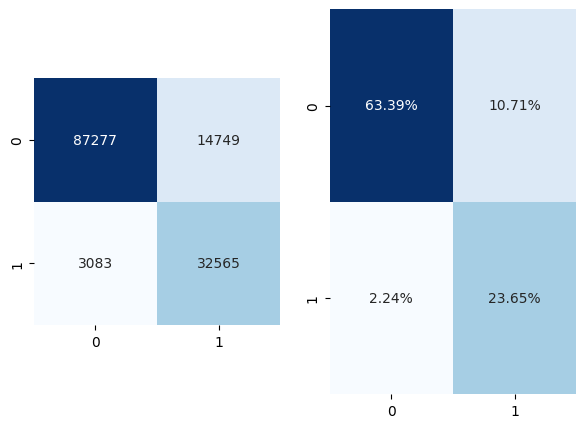

In [ ]:
conf_matrix = metrics.confusion_matrix(cv_data['target'],cv_data['predict'])
figure,(ax_1,ax_2) = plt.subplots(1,2, figsize = (7,5))

sns.heatmap(conf_matrix, square = True, annot = True,
            cmap = 'Blues',fmt = 'd' ,cbar = False ,ax= ax_1)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot = True,
            cmap = 'Blues',fmt = '.2%' ,cbar = False ,ax= ax_2)
plt.show()

In [ ]:
print(metrics.classification_report(train_data['target'], train_data['predict'], labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91    238059
           1       0.69      0.91      0.78     83180

    accuracy                           0.87    321239
   macro avg       0.83      0.88      0.84    321239
weighted avg       0.89      0.87      0.87    321239



In [ ]:
print(metrics.classification_report(cv_data['target'],cv_data['predict'], labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91    102026
           1       0.69      0.91      0.79     35648

    accuracy                           0.87    137674
   macro avg       0.83      0.88      0.85    137674
weighted avg       0.89      0.87      0.88    137674



In [ ]:
################### Scores ########################3

In [ ]:
train_data['score'] = scorecard.score(X_train)
cv_data['score'] = scorecard.score(X_cv)

In [ ]:
cv_data['score'].max(), cv_data['score'].min()

(747.5298936420206, 412.3518506327522)

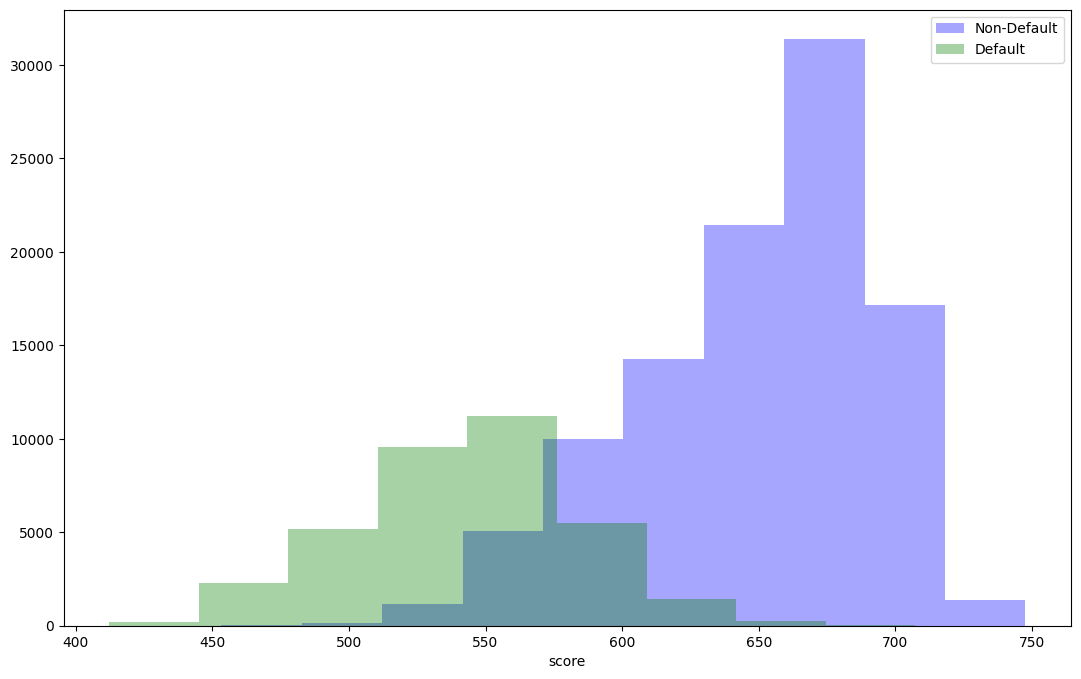

In [ ]:
y_test = cv_data['target']
score = cv_data['score']

mask = y_test == 0

figure, ax = plt.subplots(figsize=(13,8))
plt.hist(score[mask],label = "Non-Default",color = 'b',alpha = 0.35)
plt.hist(score[~mask],label = "Default",color = 'g',alpha = 0.35)
plt.xlabel("score")
plt.legend()
plt.show()

In [ ]:
# above is the distribution of deafult vs non-default

Text(0, 0.5, 'Count')

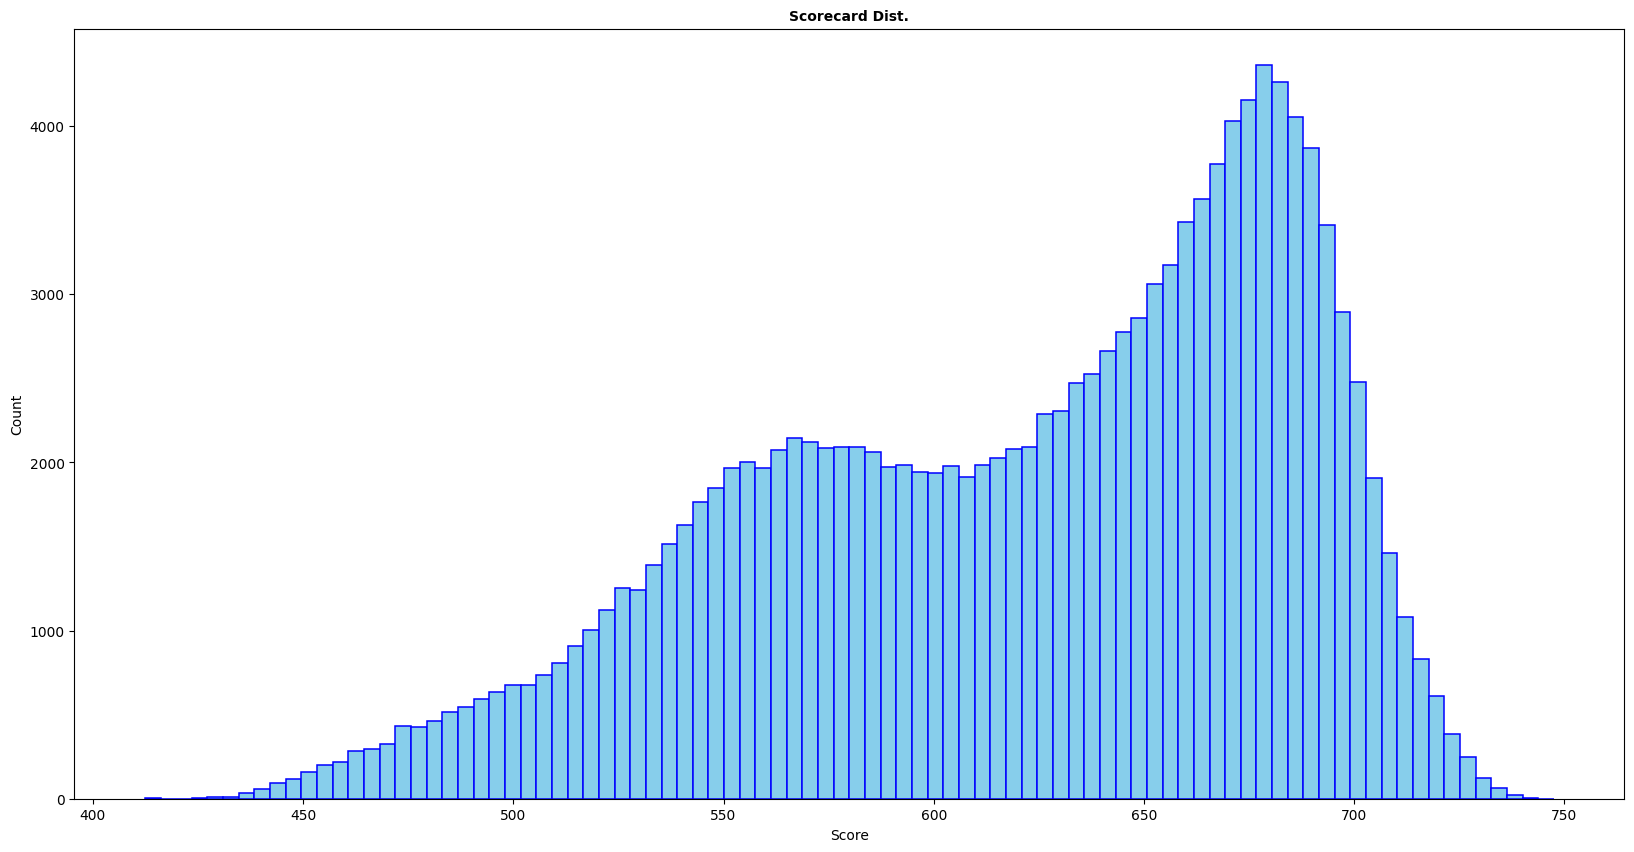

In [ ]:
# Distribution of scores
plt.figure(figsize=(20,10))

plt.hist(score,
         bins = 90,
         edgecolor = 'blue',
         color = "skyblue",
         linewidth = 1.1)

plt.title('Scorecard Dist.',fontweight = "bold",fontsize = 10)
plt.xlabel('Score')
plt.ylabel('Count')



In [ ]:
# Lets plot scores against Probability

Text(0, 0.5, 'Prob')

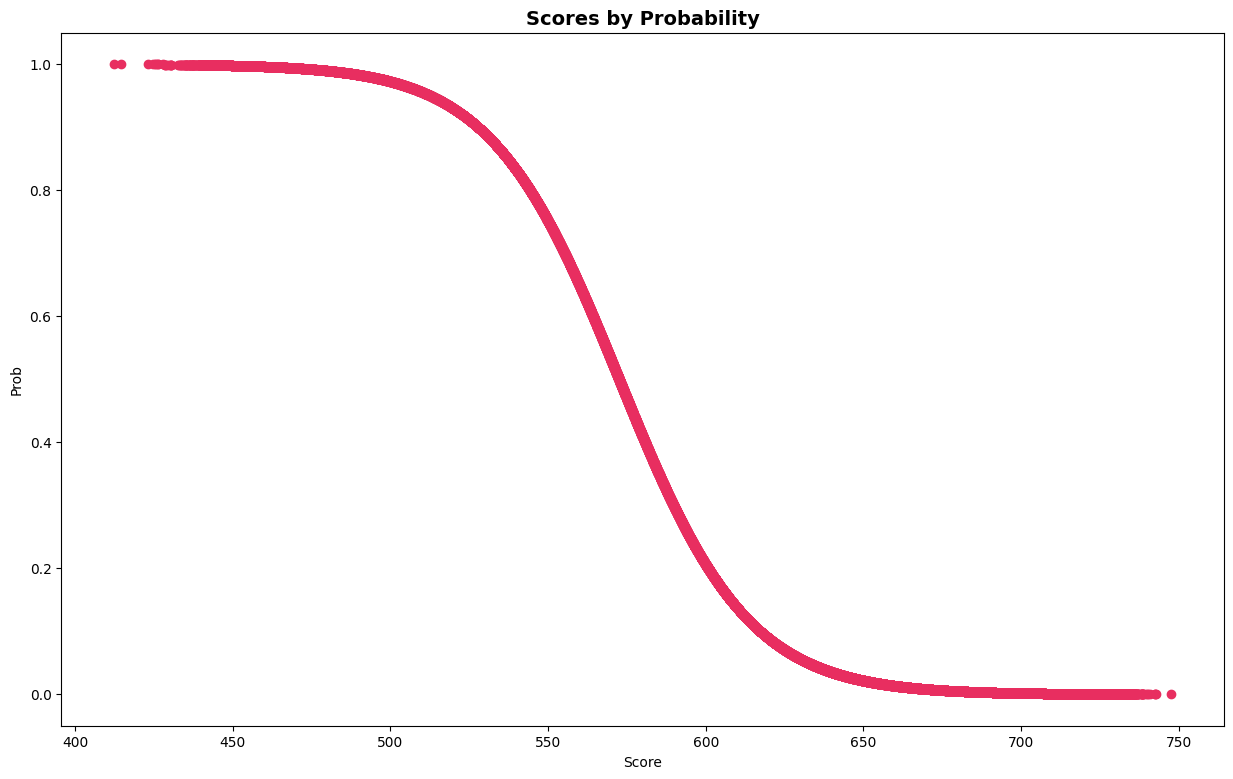

In [ ]:
plt.figure(figsize = (15,9))

plt.scatter(x = score,
            y = cv_data['pred_prob'],
            color = '#e82e60'
)
plt.title('Scores by Probability',fontweight = 'bold',fontsize = 14)
plt.xlabel('Score')
plt.ylabel('Prob')

In [ ]:
# Inference

In [ ]:
test['Probability'] = scorecard.predict_proba(X_test)[:,1]
submit_df = test[['customer_ID','Probability']].copy()
submit_df.to_csv("Submission.csv")

In [ ]:
submit_df.count(),submit_df.max(),submit_df.min()

(customer_ID    924621
 Probability    924621
 dtype: int64,
 customer_ID    fffffa7cf7e453e1acc6a1426475d5cb9400859f82ff61...
 Probability                                             0.999495
 dtype: object,
 customer_ID    00000469ba478561f23a92a868bd366de6f6527a684c9a...
 Probability                                              0.00015
 dtype: object)

In [ ]:
temp = submit_df[submit_df['Probability']>0.5]
len(temp)

220810

In [ ]:
# Basically out of 9,24,621 individuals 2,20,810 have the probabilty
# of defaulting in credit amount payment